# IMPORTING DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("House_Rent_Dataset.csv")
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


# DATA DICTIONARY

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

# DATA PREPROCESSING

In [3]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [4]:
df.tail(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4736,2022-06-28,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Family,3,Contact Owner
4737,2022-07-07,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4738,2022-07-06,2,17000,855,4 out of 5,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [5]:
df.shape

(4746, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


Mean Rent is greater than twice of Median rent, so there are definitely some outliers in this column

In [8]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

# CHECKING FOR MISSING VALUES

In [9]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

There are no missing values in this dataset

In [10]:
df.nunique()

Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64

In [11]:
print(df.duplicated().sum())
df = df.drop_duplicates()

0


# EXPLORATORY DATA ANALYSIS

In [12]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
num_feature.remove('Rent')
print(num_feature)

['BHK', 'Size', 'Bathroom']


D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


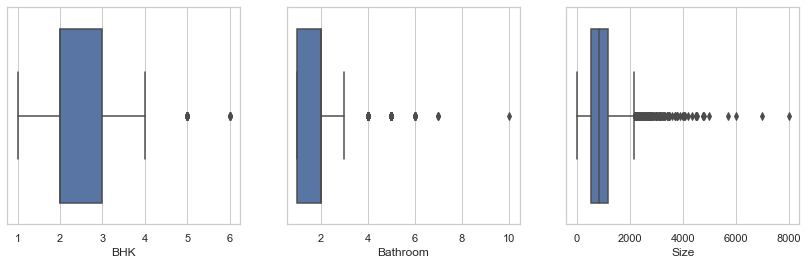

In [13]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.boxplot(df['BHK'])

plt.subplot(1, 3, 2)
sns.boxplot(df['Bathroom'])

plt.subplot(1, 3, 3)
sns.boxplot(df['Size'])

plt.show()

<AxesSubplot:xlabel='Size', ylabel='Density'>

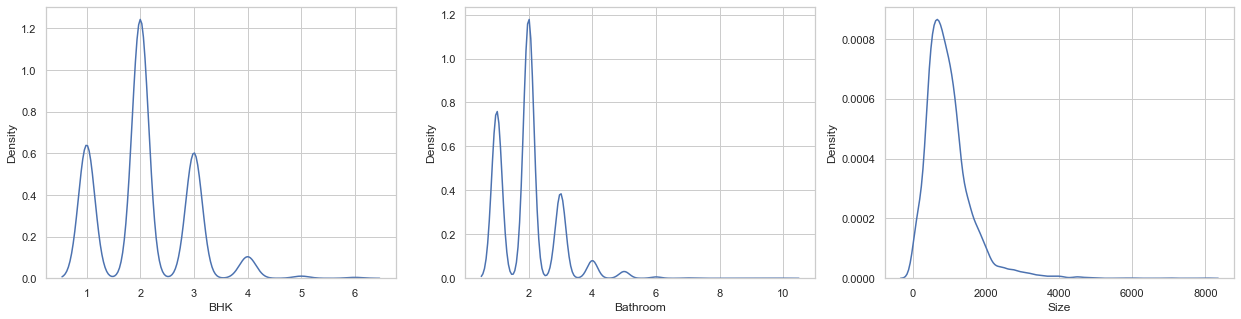

In [14]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(right=1.5)

plt.subplot(1, 3, 1)
sns.kdeplot(df['BHK'])

plt.subplot(1, 3, 2)
sns.kdeplot(df['Bathroom'])

plt.subplot(1, 3, 3)
sns.kdeplot(df['Size'])

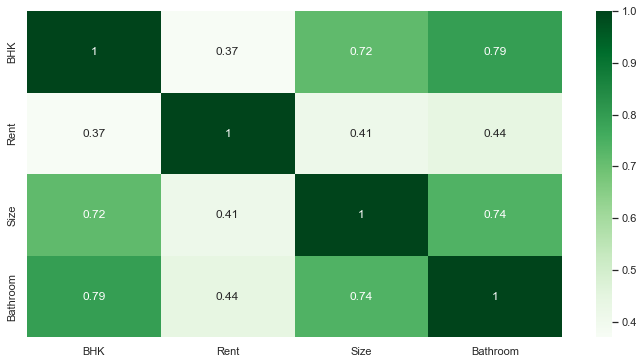

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

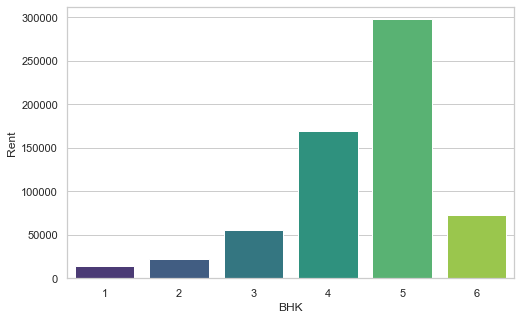

In [16]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df['BHK'].sort_values(ascending=True), 
                 y=df['Rent'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

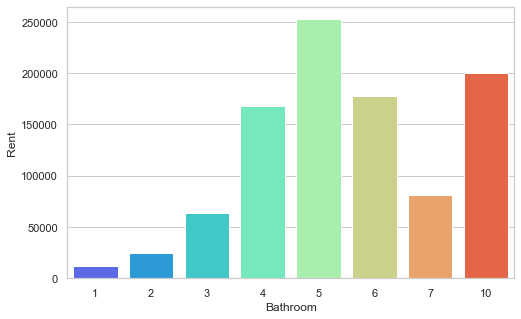

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df['Bathroom'].sort_values(ascending=True), 
                 y=df['Rent'], 
                 palette='rainbow',
                 ci = None)
plt.ylabel('Rent');

In [18]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


In [19]:
cat_1=[feature for feature in cat_feature if len(df[feature].unique())<25]
print(cat_1)

['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


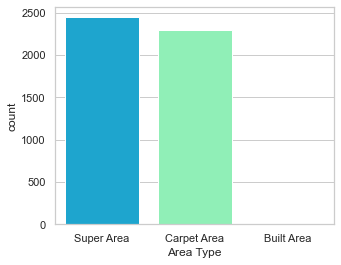

D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


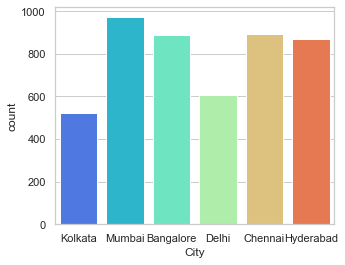

D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


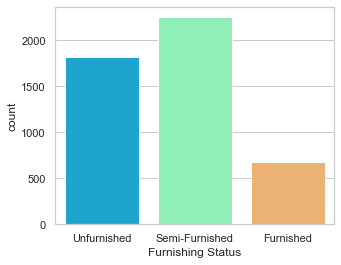

D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


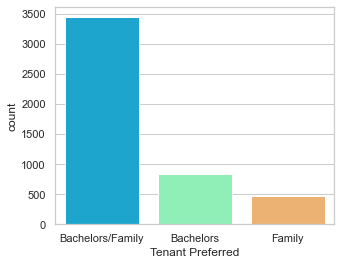

D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


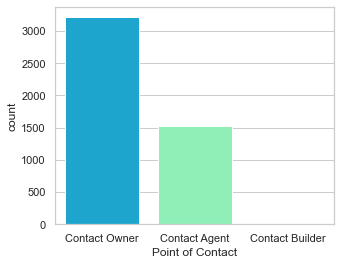

In [20]:
for feature in cat_1:
    fig=plt.figure(figsize=(5,4))
    sns.countplot(df[feature],palette='rainbow')
    plt.show()

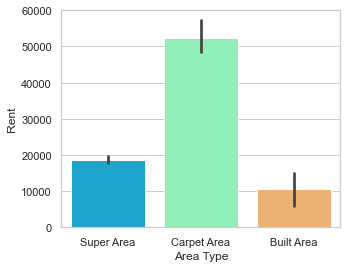

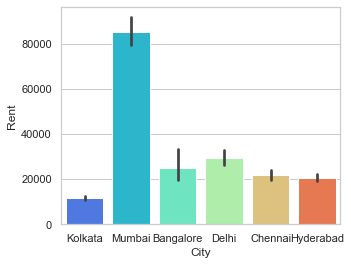

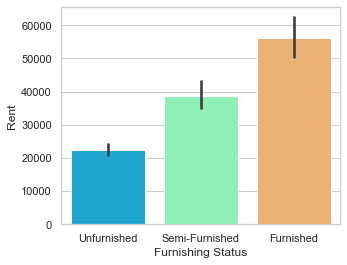

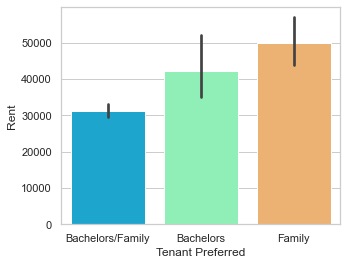

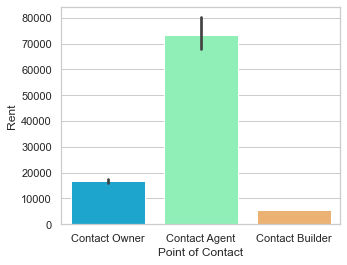

In [21]:
for feature in cat_1:
    fig=plt.figure(figsize=(5,4))
    sns.barplot(x=df[feature],y=df["Rent"],palette='rainbow')
    plt.show()

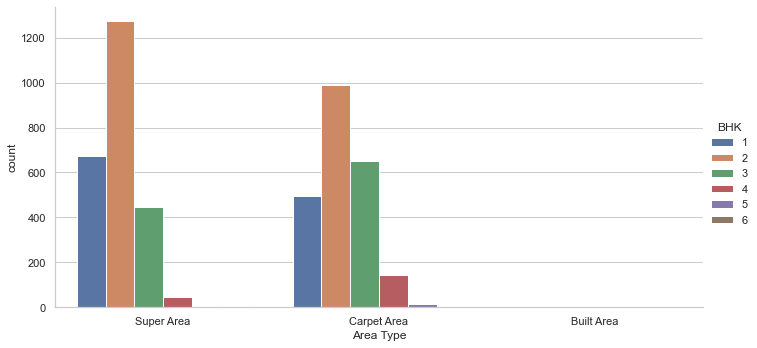

In [22]:
sns.catplot(
    data=df,
    x="Area Type",
    kind='count',
    hue="BHK",
    aspect=2
)
plt.show()

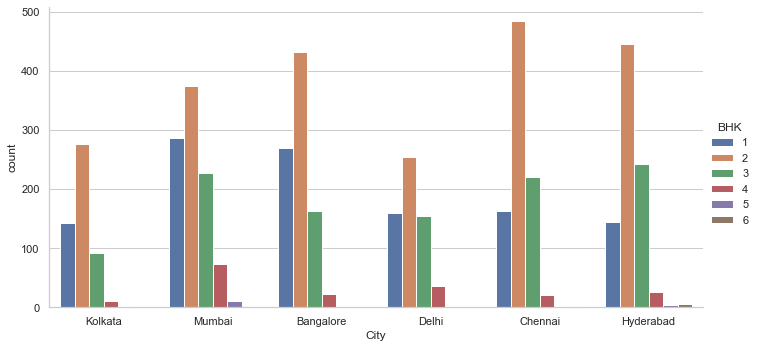

In [23]:
sns.catplot(data=df,
    x='City',
    kind='count',
    hue="BHK",
    aspect=2
)
plt.show()

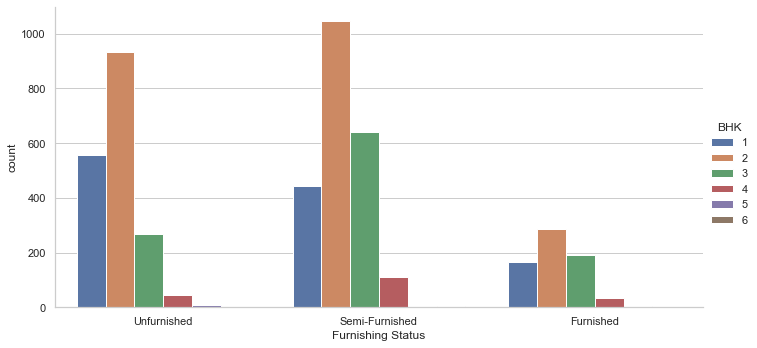

In [24]:
sns.catplot(
    data=df,
    x="Furnishing Status",
    kind='count',
    hue="BHK",
    aspect=2
)
plt.show()

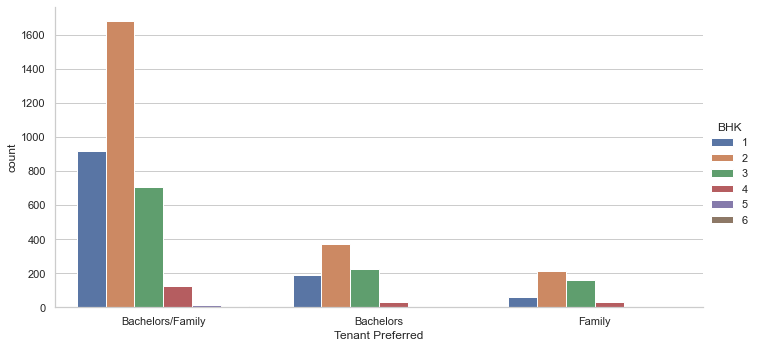

In [25]:
sns.catplot(
    data=df,
    x="Tenant Preferred",
    kind='count',
    hue="BHK",
    aspect=2
)
plt.show()

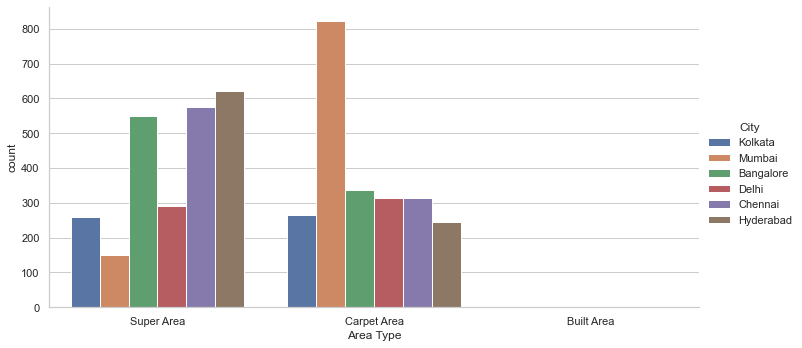

In [26]:
sns.catplot(
    data=df,
    x="Area Type",
    kind='count',
    hue="City",
    aspect=2
)
plt.show()

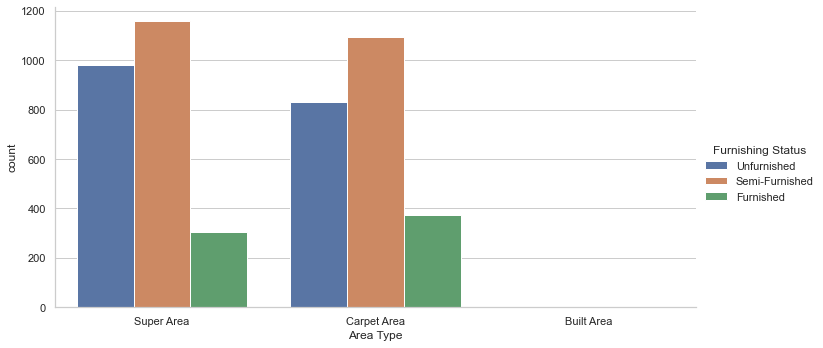

In [27]:
sns.catplot(
    data=df,
    x="Area Type",
    kind='count',
    hue="Furnishing Status",
    aspect=2
)
plt.show()


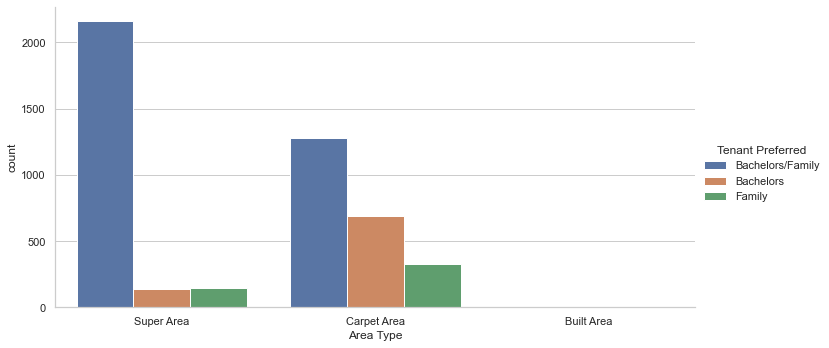

In [28]:
sns.catplot(
    data=df,
    x="Area Type",
    kind='count',
    hue="Tenant Preferred",
    aspect=2
)
plt.show()

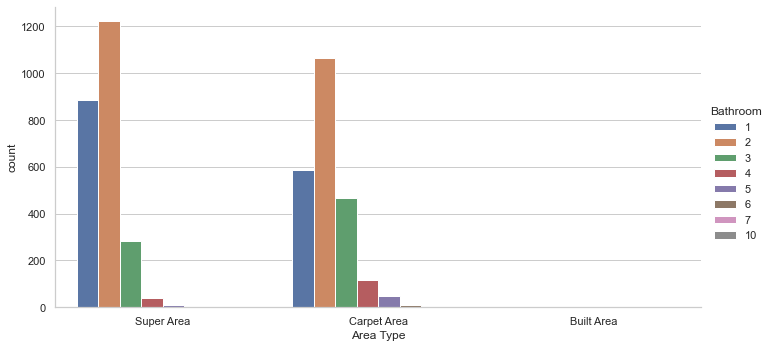

In [29]:
sns.catplot(
    data=df,
    x="Area Type",
    kind='count',
    hue="Bathroom",
    aspect=2
)
plt.show()

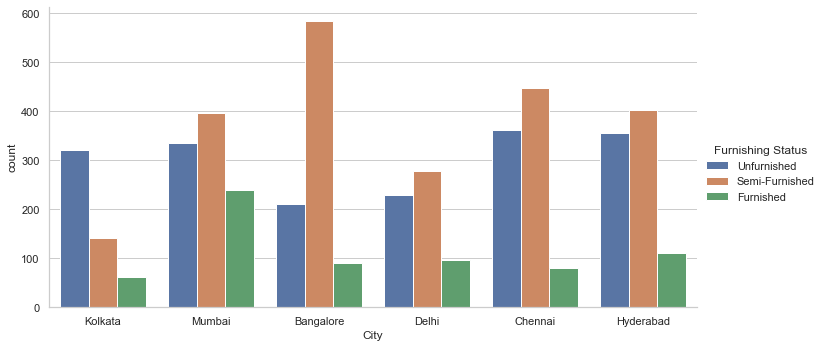

In [30]:
sns.catplot(
    data=df,
    x="City",
    kind='count',
    hue="Furnishing Status",
    aspect=2
)
plt.show()

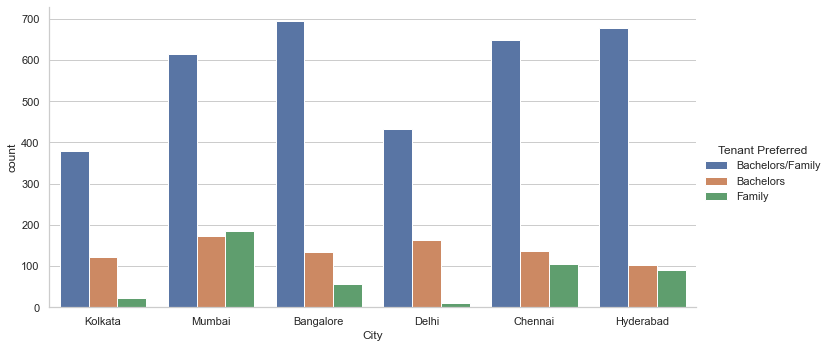

In [31]:
sns.catplot(
    data=df,
    x="City",
    kind='count',
    hue="Tenant Preferred",
    aspect=2
)
plt.show()

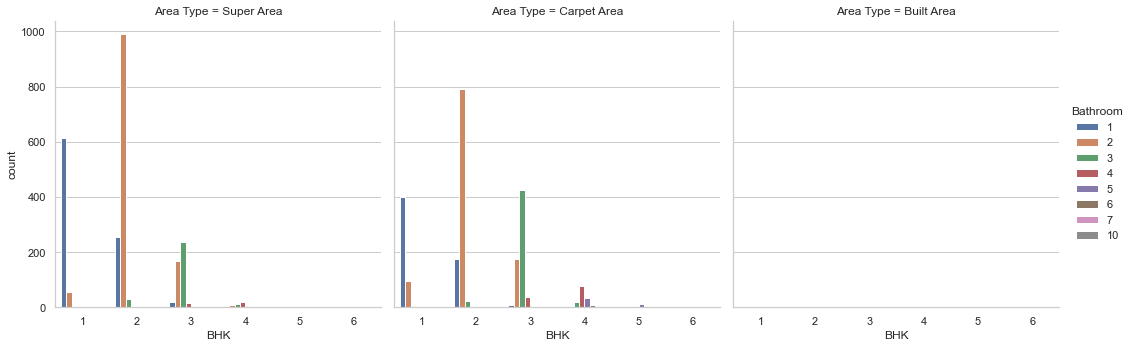

In [32]:
sns.catplot(
    data=df,
    col='Area Type',
    kind='count',
    hue="Bathroom",
    x="BHK",
    height=5
)
plt.show()

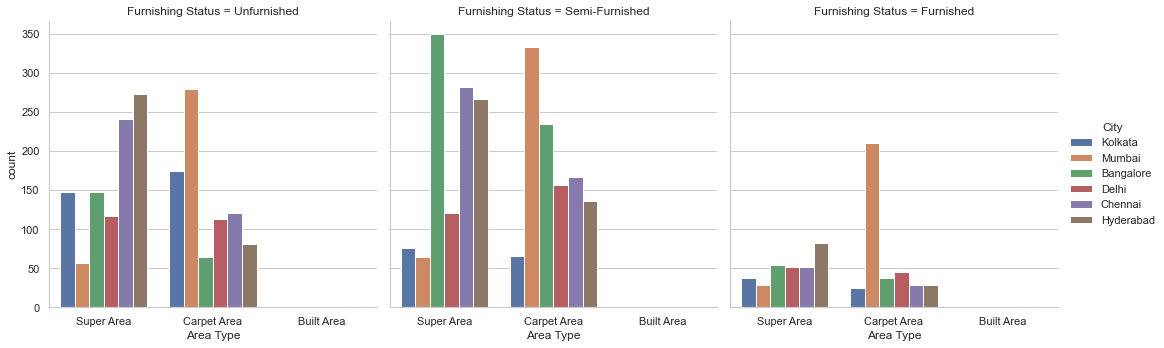

In [33]:
sns.catplot(
    data=df,
    x='Area Type',
    kind='count',
    hue="City",
    col="Furnishing Status",
    height=5
)
plt.show()

Key Points :

If the House is Furnishied then it is more likely that the Area Type is Carpet Area and you will find it in Mumbai.

If the House in Semi-Furnished then both Super Area and Carpet Area are common, the abundancy or high in Mumbai and Banglore.

Unfurnished houses are more common in Mumbai and Hyderabad.

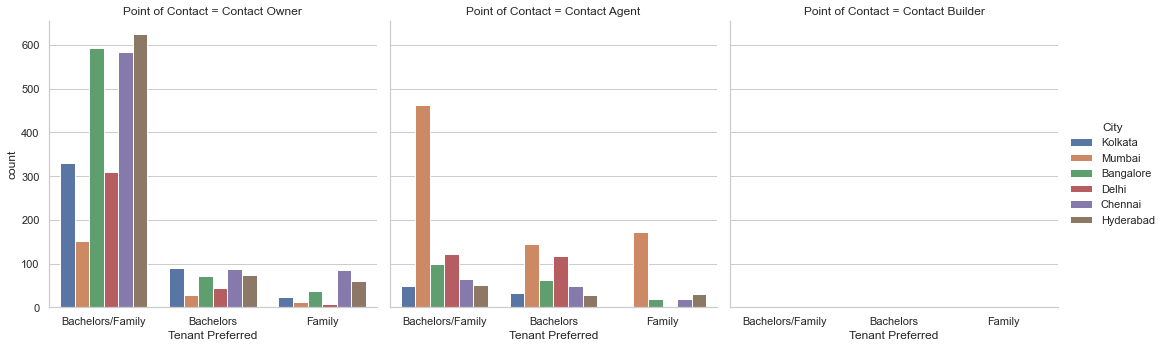

In [34]:
sns.catplot(
    data=df,
    hue='City',
    kind='count',
    x="Tenant Preferred",
    col="Point of Contact",
    height=5
)
plt.show()


If you directly contacted the Contact(Rent Home) Owner, you are likely to be a Family or Bachelor and you are more likely to found a house in Hyderbad, Delhi and Banglore. Whereas, as we know that Mumbai is a more Modernised City, In Mumbai majority of the Rental Homes are rented through a Contact Agent.

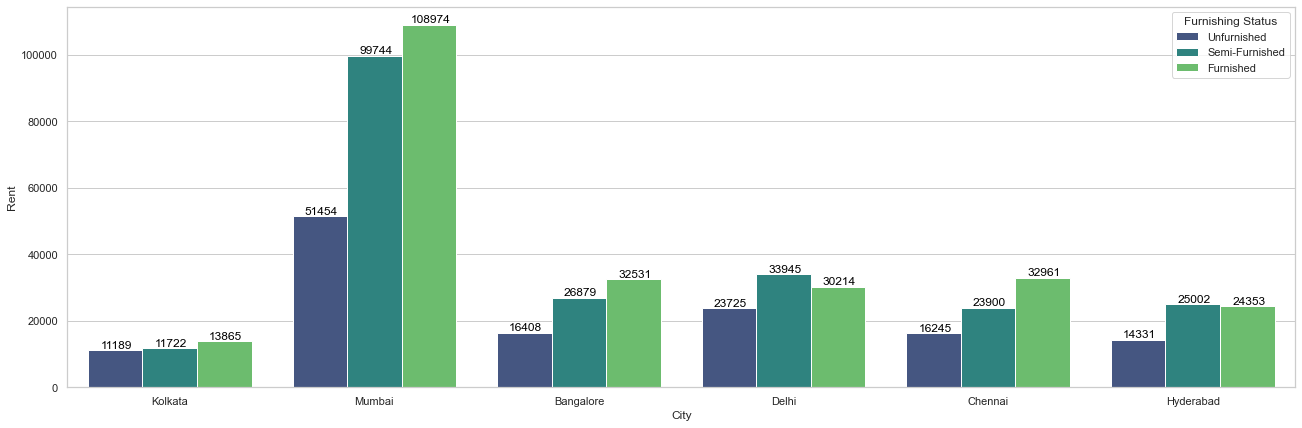

In [35]:
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'],
                 hue = df['Furnishing Status'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

Furnished Flat definitely has the highest rent (with the exception of Hyderabad). Also, a furnished flat in Mumbai will be the costliest if you are willing to rent a Flat/Apartment in case of these cities

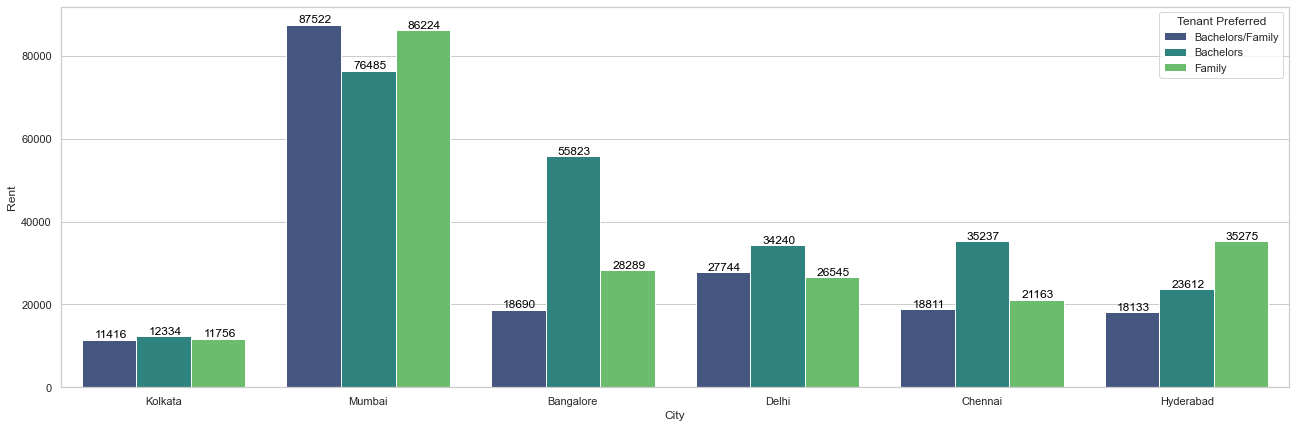

In [36]:
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=df['City'], 
                 y=df['Rent'],
                 hue = df['Tenant Preferred'], 
                 palette='viridis',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

In Chennai, Delhi and Bangalore, Bachelors usually have to pay more rent as compared to others

# FEATURE ENGINEERING

Posted On column has an object datatype while it is a date, so lets convert it into right datatype

In [37]:
df['Posted On'] = pd.to_datetime(df['Posted On'])
df['month posted'] = df['Posted On'].dt.month
df['day posted'] = df['Posted On'].dt.day
df['day of week posted'] = df['Posted On'].dt.day_of_week
df['quarter poster'] = df['Posted On'].dt.quarter

df.drop('Posted On', axis = 1, inplace= True)

In [38]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,0,3
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,0,2


In [39]:
df["Floor"].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [40]:
d=list(df["Floor"].str[:2])
b=list(df["Floor"].str[-2:])

floor1=pd.DataFrame(d,columns=["Current"] ) 
floor2=pd.DataFrame(b,columns=["Total"] )

floor4=pd.concat([floor1,floor2],axis=1)
floor4

,Current,Total
0,Gr,2
1,1,3
2,1,3
3,1,2
4,1,2
...,...,...
4741,3,5
4742,1,4
4743,3,5
4744,23,34


In [41]:
df=df.drop("Floor",axis=1)
data=pd.concat([df,floor4],axis=1)

In [42]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster,Current,Total
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2,Gr,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,0,3,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,0,2,1,2


In [43]:
data["Current"].unique()

array(['Gr', '1 ', '2 ', '4 ', '3 ', '5 ', '7 ', '8 ', 'Up', '11', 'Lo',
       '6 ', '14', '43', '13', '18', '17', '9 ', '19', '60', '34', '12',
       '26', '25', '53', '16', '10', '39', '32', '47', '28', '20', '15',
       '65', '40', '37', '22', '21', '30', '35', '33', '44', '41', '46',
       '27', '45', '48', '50', '24', '23', '29', '49', '36', '76', '3',
       '1'], dtype=object)

In [44]:
data["Current"]=data["Current"].replace("Gr",0)
data["Current"]=data["Current"].replace("Up",-1)
data["Current"]=data["Current"].replace("Lo",-2)

In [45]:
data["Total"].unique()

array([' 2', ' 3', ' 1', ' 4', ' 5', '14', ' 8', ' 6', '19', '10', ' 7',
       '13', '78', '18', '12', '24', '31', '21', '23', '20', ' 9', '22',
       '58', '16', '66', '48', '40', '44', '42', '41', '60', '32', '30',
       '29', '89', '15', '11', '28', '17', '45', '35', '75', '38', '51',
       '43', '25', '27', '26', '76', '36', '37', '55', '68', '77', '50',
       '59', '62', '39', '52', '54', '33', '46', '85', '71', '81', '34',
       '3', 'nd', '1'], dtype=object)

In [46]:
data["Total"]=data["Total"].replace("nd",0)

In [47]:
data.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster,Current,Total
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,0,3,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,0,2,1,2


In [48]:
data=data.drop("Area Locality",axis=1)

In [49]:
data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,month posted,day posted,day of week posted,quarter poster,Current,Total
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,5,18,2,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,13,4,2,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,5,16,0,2,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,7,4,0,3,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,5,9,0,2,1,2


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BHK                 4746 non-null   int64 
 1   Rent                4746 non-null   int64 
 2   Size                4746 non-null   int64 
 3   Area Type           4746 non-null   object
 4   City                4746 non-null   object
 5   Furnishing Status   4746 non-null   object
 6   Tenant Preferred    4746 non-null   object
 7   Bathroom            4746 non-null   int64 
 8   Point of Contact    4746 non-null   object
 9   month posted        4746 non-null   int64 
 10  day posted          4746 non-null   int64 
 11  day of week posted  4746 non-null   int64 
 12  quarter poster      4746 non-null   int64 
 13  Current             4746 non-null   object
 14  Total               4746 non-null   object
dtypes: int64(8), object(7)
memory usage: 722.3+ KB


In [51]:
data["Current"]=pd.to_numeric(data["Current"],errors='coerce')
data["Total"]=pd.to_numeric(data["Total"],errors='coerce')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   BHK                 4746 non-null   int64 
 1   Rent                4746 non-null   int64 
 2   Size                4746 non-null   int64 
 3   Area Type           4746 non-null   object
 4   City                4746 non-null   object
 5   Furnishing Status   4746 non-null   object
 6   Tenant Preferred    4746 non-null   object
 7   Bathroom            4746 non-null   int64 
 8   Point of Contact    4746 non-null   object
 9   month posted        4746 non-null   int64 
 10  day posted          4746 non-null   int64 
 11  day of week posted  4746 non-null   int64 
 12  quarter poster      4746 non-null   int64 
 13  Current             4746 non-null   int64 
 14  Total               4746 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 722.3+ KB


# ENCODING CATEGORICAL VARIABLES

In [53]:
categorical=["Area Type","City","Furnishing Status","Tenant Preferred","Point of Contact"]
categorical

['Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [54]:
for i in range(5):
    print(data[categorical[i]].unique())

['Super Area' 'Carpet Area' 'Built Area']
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
['Unfurnished' 'Semi-Furnished' 'Furnished']
['Bachelors/Family' 'Bachelors' 'Family']
['Contact Owner' 'Contact Agent' 'Contact Builder']


In [55]:
def one_hot_encoding(data,col):
    oneH = pd.get_dummies(data[col])
    data = data.drop(col,axis = 1)
    data = data.join(oneH)
    return data

In [56]:
for col in categorical:
    data = one_hot_encoding(data, col)

In [57]:
data=data.drop("Super Area",axis=1)
data=data.drop("Kolkata",axis=1)
data=data.drop("Unfurnished",axis=1)
data=data.drop("Bachelors/Family",axis=1)
data=data.drop("Contact Owner",axis=1)

In [58]:
data.head()

,BHK,Rent,Size,Bathroom,month posted,day posted,day of week posted,quarter poster,Current,Total,...,Chennai,Delhi,Hyderabad,Mumbai,Furnished,Semi-Furnished,Bachelors,Family,Contact Agent,Contact Builder
0,2,10000,1100,2,5,18,2,2,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,20000,800,1,5,13,4,2,1,3,...,0,0,0,0,0,1,0,0,0,0
2,2,17000,1000,1,5,16,0,2,1,3,...,0,0,0,0,0,1,0,0,0,0
3,2,10000,800,1,7,4,0,3,1,2,...,0,0,0,0,0,0,0,0,0,0
4,2,7500,850,1,5,9,0,2,1,2,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

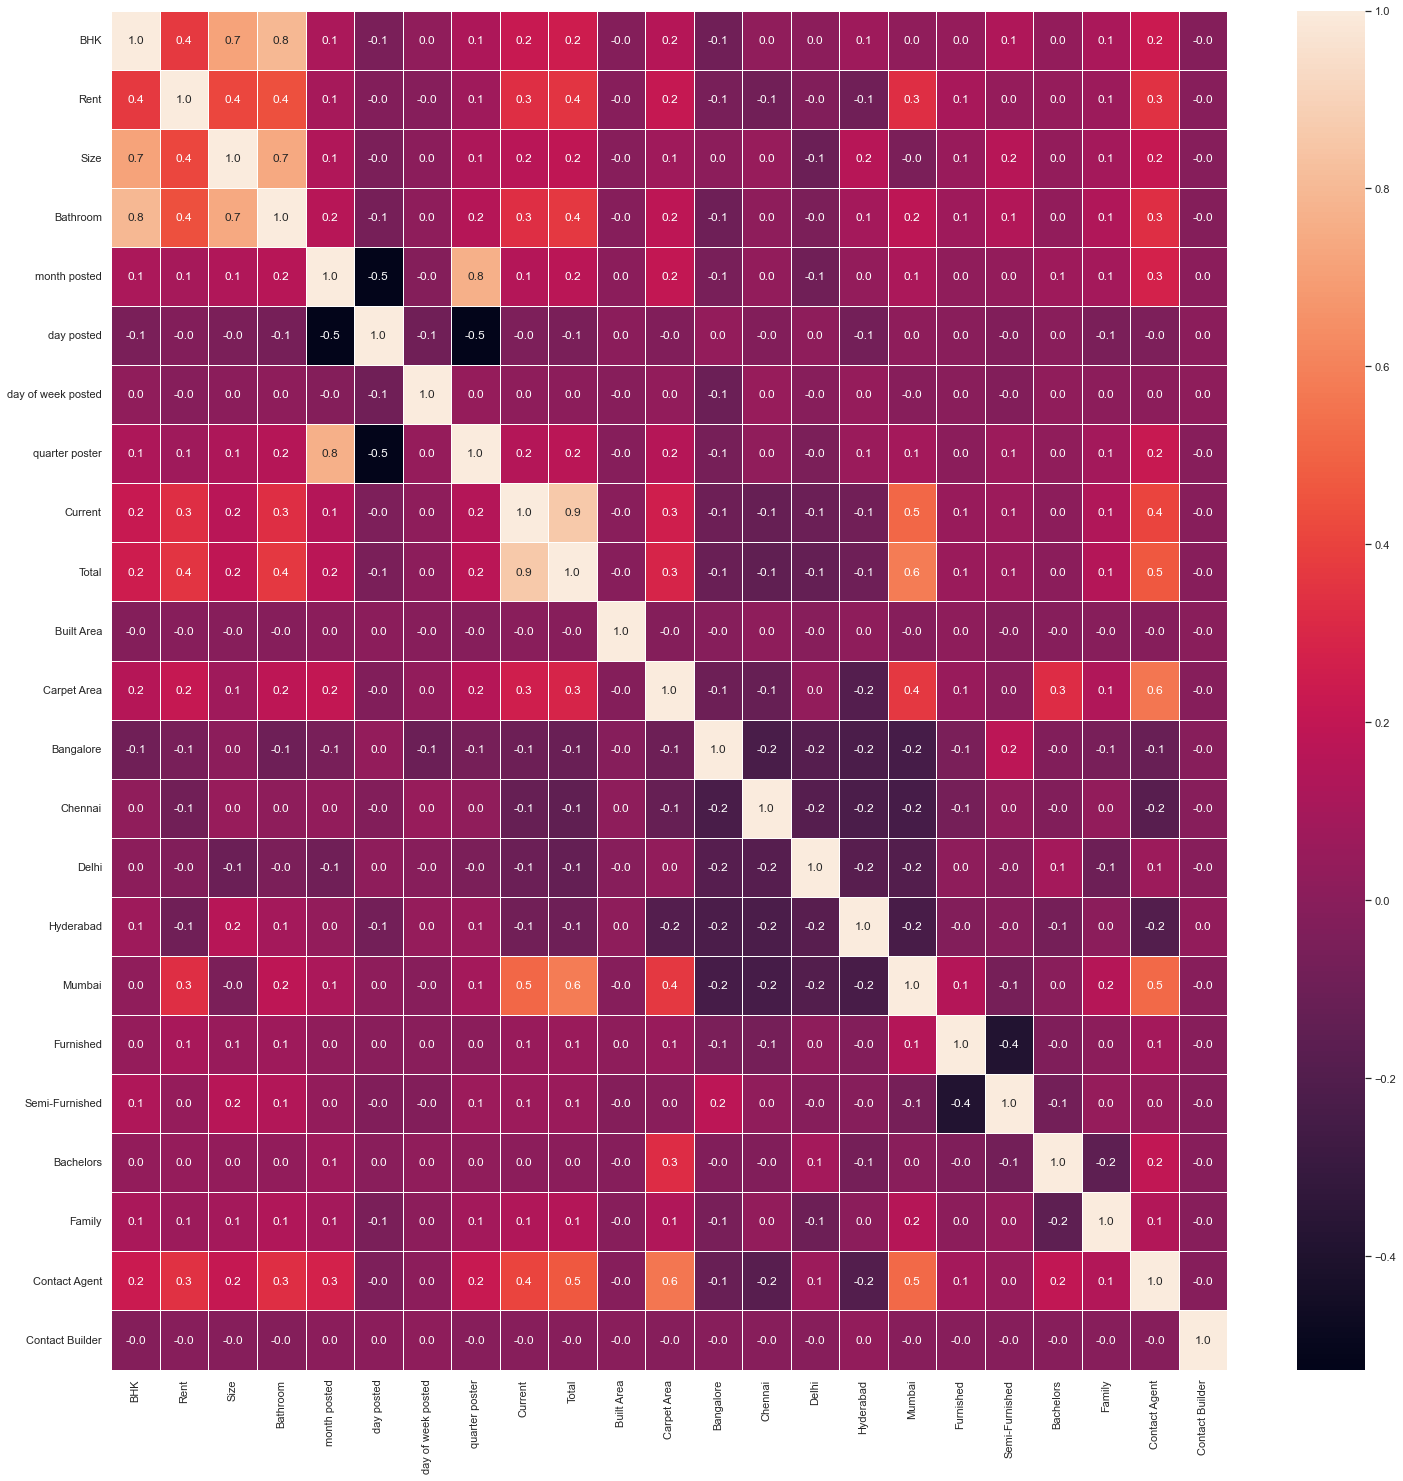

In [59]:
#correlation map
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# SEPARATING INDEPENDENT AND DEPENDENT VARIABLES

In [60]:
X=data.drop(["Rent"],axis=1)
y=data["Rent"]

In [61]:
X

,BHK,Size,Bathroom,month posted,day posted,day of week posted,quarter poster,Current,Total,Built Area,...,Chennai,Delhi,Hyderabad,Mumbai,Furnished,Semi-Furnished,Bachelors,Family,Contact Agent,Contact Builder
0,2,1100,2,5,18,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,800,1,5,13,4,2,1,3,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1000,1,5,16,0,2,1,3,0,...,0,0,0,0,0,1,0,0,0,0
3,2,800,1,7,4,0,3,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2,850,1,5,9,0,2,1,2,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,2,5,18,2,2,3,5,0,...,0,0,1,0,0,1,0,0,0,0
4742,3,2000,3,5,15,6,2,1,4,0,...,0,0,1,0,0,1,0,0,0,0
4743,3,1750,3,7,10,6,3,3,5,0,...,0,0,1,0,0,1,0,0,1,0
4744,3,1500,2,7,6,2,3,23,34,0,...,0,0,1,0,0,1,0,1,1,0


In [62]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64

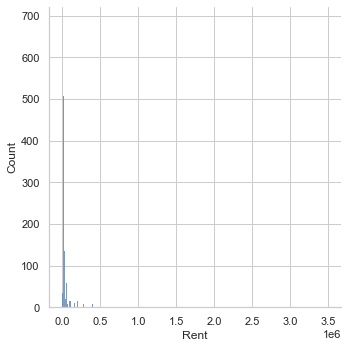

In [63]:
sns.displot(y)

In [64]:
y=np.log(y)
y

0        9.210340
1        9.903488
2        9.740969
3        9.210340
4        8.922658
          ...    
4741     9.615805
4742    10.275051
4743    10.463103
4744    10.714418
4745     9.615805
Name: Rent, Length: 4746, dtype: float64

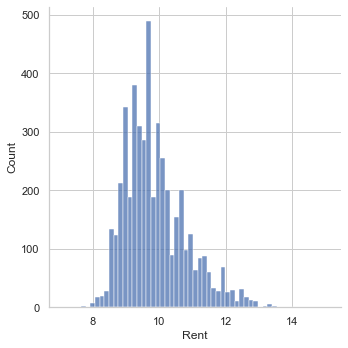

In [65]:
sns.displot(y)

# OUTLIERS DETECTION

In [66]:
dict={}
lis1=[]
for col in X.columns:
    lis1.append(col)
for i in range(1,len(lis1)):
    dict[lis1[i]]=i+1

In [67]:
dict

{'Size': 2,
 'Bathroom': 3,
 'month posted': 4,
 'day posted': 5,
 'day of week posted': 6,
 'quarter poster': 7,
 'Current': 8,
 'Total': 9,
 'Built Area': 10,
 'Carpet Area': 11,
 'Bangalore': 12,
 'Chennai': 13,
 'Delhi': 14,
 'Hyderabad': 15,
 'Mumbai': 16,
 'Furnished': 17,
 'Semi-Furnished': 18,
 'Bachelors': 19,
 'Family': 20,
 'Contact Agent': 21,
 'Contact Builder': 22}

D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: F

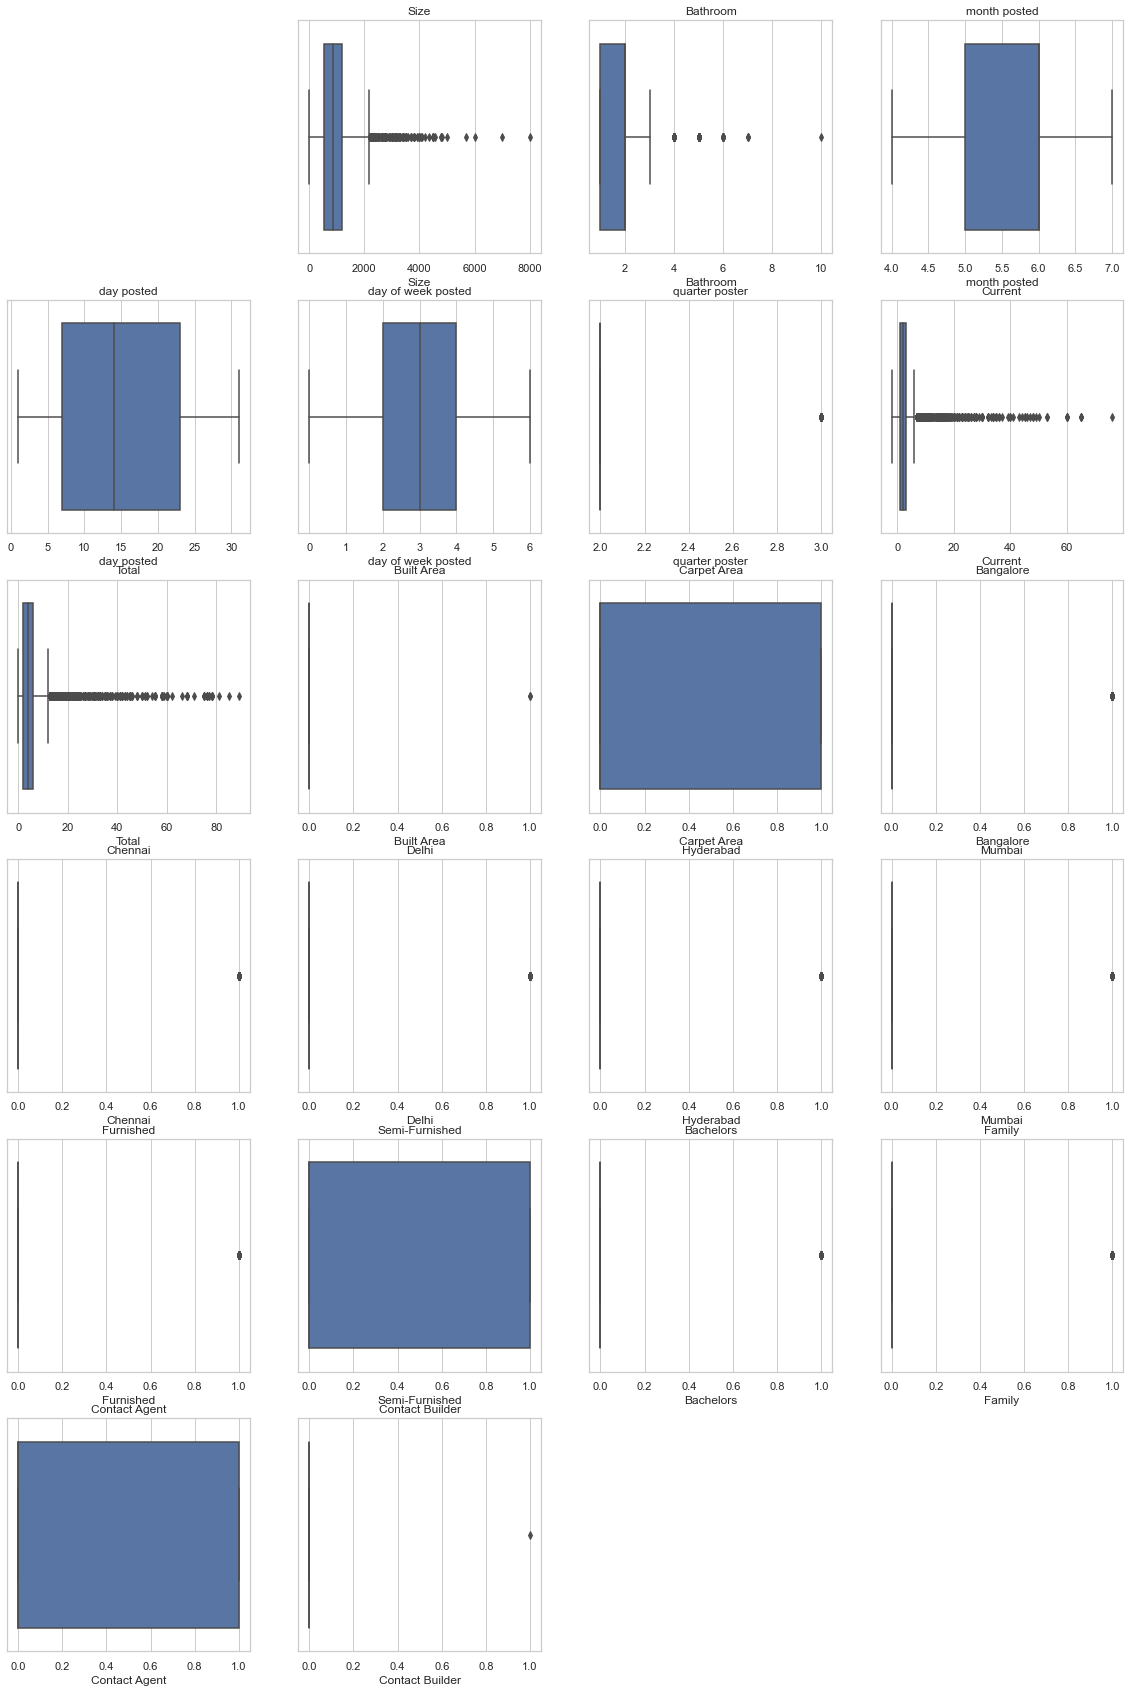

In [68]:
# BEFORE REMOVING OUTLIERS
plt.figure(figsize = (20,30))
for var, i in dict.items():
    plt.subplot(6,4,i)
    sns.boxplot(data[var], whis = 1.5)
    plt.title(var)
plt.show()

In [69]:
numeric_cols = [] 
for i in data.columns:
    if data[i].dtype in (np.float64, np.int64):
        numeric_cols.append(i)

In [70]:
percent_low = []
percent_high = []
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (iqr*1.5)
    high = q3 + (iqr*1.5)
    count_l = len(np.where(data[col] < low)[0])
    count_h = len(np.where(data[col] > high)[0])
    percent_low.append(round(count_l/len(data[col])*100, 2))
    percent_high.append(round(count_h/len(data[col])*100, 2))
outlier_table = pd.DataFrame({'Factor':numeric_cols, 'Lower Bound %':percent_low, 'Upper Bound %':percent_high})
outlier_table

,Factor,Lower Bound %,Upper Bound %
0,BHK,0.0,0.57
1,Rent,0.0,10.96
2,Size,0.0,4.28
3,Bathroom,0.0,4.89
4,month posted,0.0,0.00
5,day posted,0.0,0.00
6,day of week posted,0.0,0.00
7,quarter poster,0.0,20.61
8,Current,0.0,13.44
9,Total,0.0,14.83


In [71]:
from scipy.stats.mstats import winsorize
for i,col in enumerate(numeric_cols, 1):
    data[col] = winsorize(data[col], (max(percent_low)/100, max(percent_high)/100))

D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda 11\lib\site-packages\seaborn\_decorators.py:36: F

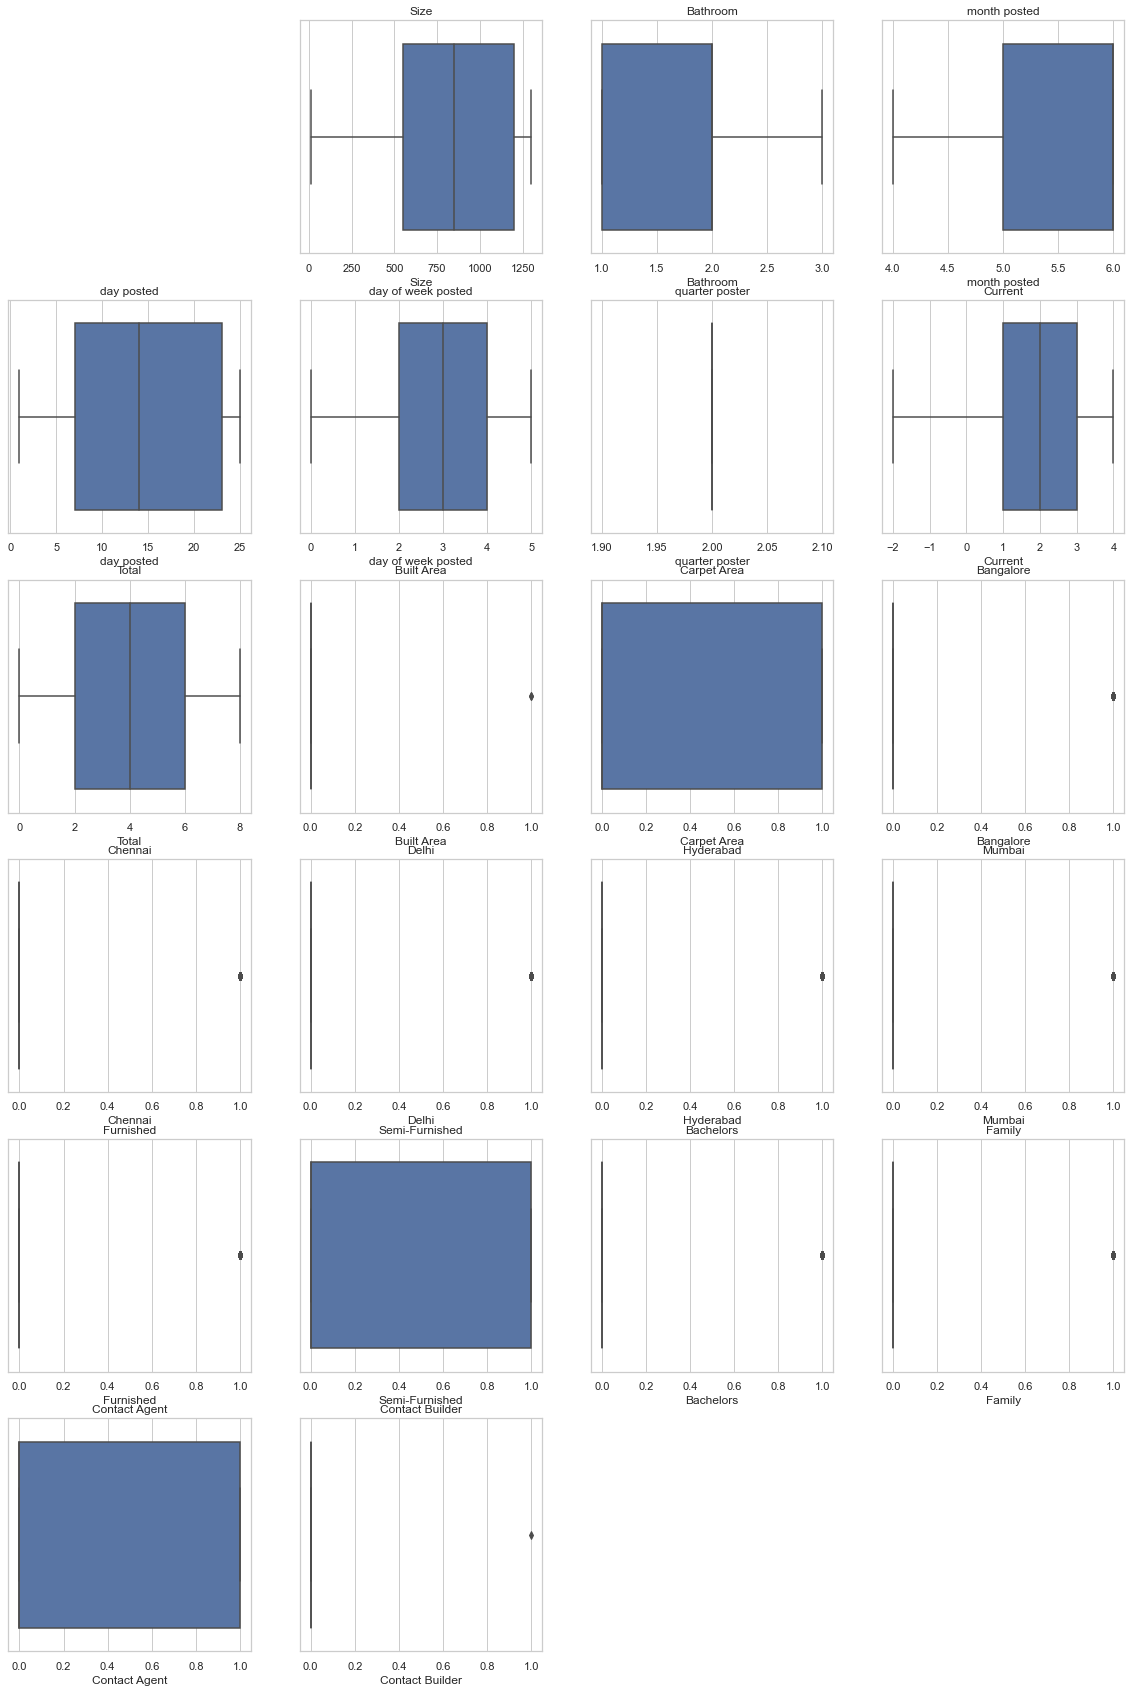

In [72]:
# BOXPLOT AFTER REMOVING OUTLIERS
plt.figure(figsize = (20,30))
for var, i in dict.items():
    plt.subplot(6,4,i)
    sns.boxplot(data[var], whis = 1.5)
    plt.title(var)
plt.show()

# FITTING OLS MODEL AFTER LOG TRANFORMATION

In [73]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

D:\anaconda 11\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rent   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     949.8
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:53:28   Log-Likelihood:                -2410.6
No. Observations:                4746   AIC:                             4867.
Df Residuals:                    4723   BIC:                             5016.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.9862      0.063    126.739      0.000       7.863       8.110
BHK                    0.2276      0.013     17.945      0.000       0.203       0.252
Size                   0.0004   1.55e-05     26.783      0.000       0.000       0.000
Bathroom               0.1502      0.013     11.387      0.000       0.124       0.176
month posted          -0.0088      0.012     -0.767      0.443      -0.031       0.014
day posted            -0.0011      0.001     -1.458      0.145      -0.003       0.000
day of week posted     0.0029      0.003      0.893      0.372      -0.003       0.009
quarter poster         0.0384      0.023      1.654      0.098      -0.007       0.084
Current                0.0038      0.002      1.877      0.061      -0.000       0.008
Total                  0.0044      0.001      3.297      0.001       0.002       0.007
Built Area            -0.0849      0.285     -0.297      0.766      -0.645       0.475
Carpet Area            0.0388      0.015      2.566      0.010       0.009       0.068
Bangalore              0.2976      0.023     12.704      0.000       0.252       0.344
Chennai                0.2563      0.023     11.049      0.000       0.211       0.302
Delhi                  0.4744      0.025     18.896      0.000       0.425       0.524
Hyderabad              0.1362      0.024      5.733      0.000       0.090       0.183
Mumbai                 1.1946      0.028     43.246      0.000       1.140       1.249
Furnished              0.2940      0.019     15.775      0.000       0.257       0.331
Semi-Furnished         0.0994      0.013      7.390      0.000       0.073       0.126
Bachelors              0.0473      0.017      2.783      0.005       0.014       0.081
Family                -0.0748      0.021     -3.643      0.000      -0.115      -0.035
Contact Agent          0.3453      0.018     18.825      0.000       0.309       0.381
Contact Builder       -0.0834      0.404     -0.207      0.836      -0.875       0.708
==============================================================================
Omnibus:                      843.185   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9688.358
Skew:                           0.498   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                     7.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# CHECKING OLS ASSUMPTIONS AFTER LOG TRANSFORMATION

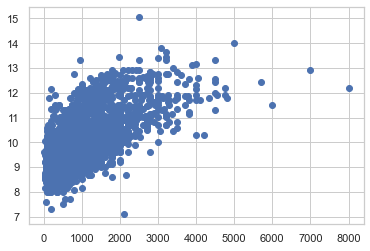

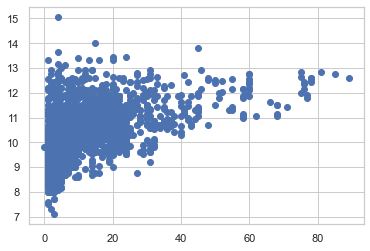

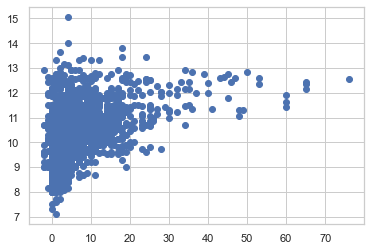

In [74]:
#checking linearity assumption
col1=["Size","Total","Current"]
for col in col1:
    plt.scatter(X[col],y)
    plt.show()

In [75]:
#checking error mean assumption
residuals=result.resid
np.mean(residuals)

7.988740071672766e-14

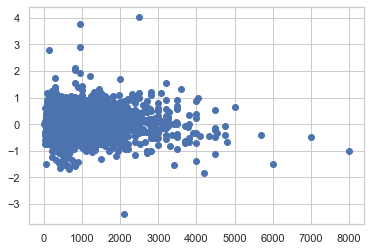

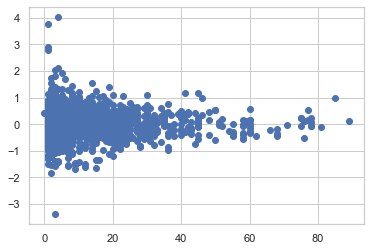

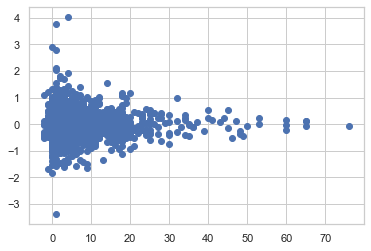

In [76]:
#checking residual relation with independent variable
for col in col1:
    plt.scatter(X[col],residuals)
    plt.show()

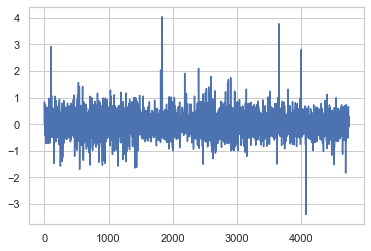

In [77]:
# checking Auto correlation
plt.plot(residuals.index,residuals)

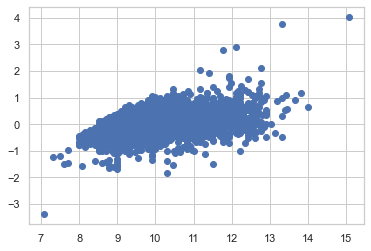

In [78]:
#checking for homoscedaticity assumption
plt.scatter(y,residuals)

In [79]:
#checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values,i) for i in range(1,X.shape[1])}

{'BHK': 3.2527123973259404,
 'Size': 2.8116883545417273,
 'Bathroom': 3.9741398699300845,
 'month posted': 2.691595002981806,
 'day posted': 1.510368947709002,
 'day of week posted': 1.0360904823993489,
 'quarter poster': 2.5735377476923764,
 'Current': 3.907595531033066,
 'Total': 4.557592483885006,
 'Built Area': 1.0027121211869674,
 'Carpet Area': 1.6681110044925695,
 'Bangalore': 2.4339739623946057,
 'Chennai': 2.397372597185159,
 'Delhi': 2.047572656342669,
 'Hyderabad': 2.4626110398049077,
 'Mumbai': 3.6295060270894948,
 'Furnished': 1.2454738699252577,
 'Semi-Furnished': 1.3175576277755228,
 'Bachelors': 1.218242653862414,
 'Family': 1.1036693134622662,
 'Contact Agent': 2.1458256581504456,
 'Contact Builder': 1.0024197463040265}

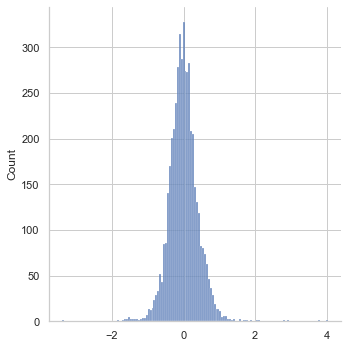

In [80]:
#checking normality assumption
sns.displot(residuals)
plt.show()

# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [81]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [82]:
X_train.shape

(3322, 23)

In [83]:
X_test.shape

(1424, 23)

In [84]:
y_train.shape

(3322,)

In [85]:
y_test.shape

(1424,)

# FEATURE SCALING 

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[ 0.        , -0.10544874,  0.1987489 , ..., -0.33154661,
        -0.68882398,  0.        ],
       [ 0.        , -0.10544874,  0.04369365, ..., -0.33154661,
        -0.68882398,  0.        ],
       [ 0.        ,  1.08605024,  0.66391465, ..., -0.33154661,
        -0.68882398,  0.        ],
       ...,
       [ 0.        , -1.29694771, -0.54551629, ..., -0.33154661,
        -0.68882398,  0.        ],
       [ 0.        , -0.10544874, -0.25866408, ..., -0.33154661,
         1.45174969,  0.        ],
       [ 0.        , -1.29694771, -0.34394447, ..., -0.33154661,
        -0.68882398,  0.        ]])

In [87]:
scaler.transform(X_test)

array([[ 0.        , -1.29694771, -0.88663783, ..., -0.33154661,
         1.45174969,  0.        ],
       [ 0.        , -0.10544874,  0.1987489 , ..., -0.33154661,
         1.45174969,  0.        ],
       [ 0.        , -1.29694771, -0.11136159, ..., -0.33154661,
        -0.68882398,  0.        ],
       ...,
       [ 0.        , -0.10544874, -0.11136159, ..., -0.33154661,
        -0.68882398,  0.        ],
       [ 0.        , -0.10544874, -0.03383397, ..., -0.33154661,
        -0.68882398,  0.        ],
       [ 0.        , -1.29694771, -1.11922071, ..., -0.33154661,
        -0.68882398,  0.        ]])

# MODEL BUILDING AND EVALUATION

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
models={
    "Linear Regression":LinearRegression(),
    "KNN":KNeighborsRegressor()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) 
    
    print(list(models.keys())[i])
    
    y_pred=model.predict(X_test)
    comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    print(comparison)
    
    mse1=mean_squared_error(y_test,y_pred)
    r1=r2_score(y_test,model.predict(X_test))
    adr2=(1 - (1-model.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
   
    
    print("TRAINING DATA ACCURACY:", model.score(X_train, y_train))
    print("TEST DATA ACCURACY", model.score(X_test, y_test))
    print("COEFFICIENT OF DETERMINATION: ",r1)
    print("ADJUSTED R^2=",adr2)
    print("******************************************************")
    print('\n')

Linear Regression
         Actual  Predicted
407    8.612503   8.885621
2013  10.308953  10.060202
2015   9.615805   9.326491
2930   9.210340   9.564245
561   10.691945  11.149581
...         ...        ...
1140  10.373491  10.700908
2169   9.615805   9.438075
1578   9.392662   9.482525
4146   9.433484   9.412636
2983   9.104980   9.062468

[1424 rows x 2 columns]
TRAINING DATA ACCURACY: 0.8136591337166996
TEST DATA ACCURACY 0.8190729738196988
COEFFICIENT OF DETERMINATION:  0.8190729738196988
ADJUSTED R^2= 0.8127515013735154
******************************************************


KNN
         Actual  Predicted
407    8.612503   8.852759
2013  10.308953   9.603601
2015   9.615805   9.755911
2930   9.210340   9.100011
561   10.691945  10.869137
...         ...        ...
1140  10.373491  10.693640
2169   9.615805   9.613001
1578   9.392662   9.818577
4146   9.433484  10.067787
2983   9.104980   8.414621

[1424 rows x 2 columns]
TRAINING DATA ACCURACY: 0.7095691574989311
TEST DATA ACCURA

In [90]:
knn_params={"n_neighbors":[3,5,7,9,11,13,15,17,3],
            "p":[1,2],
            "n_jobs":[-1,None]}



In [91]:
randomcv_models=[
                ("knn",KNeighborsRegressor(),knn_params)]
randomcv_models

[('knn',
  KNeighborsRegressor(),
  {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 3],
   'p': [1, 2],
   'n_jobs': [-1, None]})]

In [92]:
from sklearn.model_selection import GridSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=GridSearchCV(estimator=model,param_grid=params,cv=3,verbose=2)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"------------------best parameters for {model_name}----------".format(model_name))
    print(model_param[model_name])

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ......................n_jobs=-1, n_neighbors=3, p=1; total time=   0.2s
[CV] END ......................n_jobs=-1, n_neighbors=3, p=1; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=3, p=1; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=3, p=2; total time=   0.0s
[CV] END ......................n_jobs=-1, n_neighbors=3, p=2; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=3, p=2; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=5, p=1; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=5, p=2; total time=   0.1s
[CV] END ......................n_jobs=-1, n_neighbors=5, p=2; total time=   0.2s
[CV] END ......................n_jobs=-1, n_nei

In [93]:
models={
    "Linear Regression":LinearRegression(),
    "KNN":KNeighborsRegressor(n_neighbors=7,n_jobs=-1,p=1)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) 
    
    print(list(models.keys())[i])
    
    y_pred=model.predict(X_test)
    comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    print(comparison)
    
    mse1=mean_squared_error(y_test,y_pred)
    r1=r2_score(y_test,model.predict(X_test))
    adr2=(1 - (1-model.score(X_train,y_train))*(len(y)-1)/(len(y)-X.shape[1]-1))
   
    
    print("TRAINING DATA ACCURACY:", model.score(X_train, y_train))
    print("TEST DATA ACCURACY", model.score(X_test, y_test))
    print("COEFFICIENT OF DETERMINATION: ",r1)
    print("ADJUSTED R^2=",adr2)
    print("******************************************************")
    print('\n')

Linear Regression
         Actual  Predicted
407    8.612503   8.885621
2013  10.308953  10.060202
2015   9.615805   9.326491
2930   9.210340   9.564245
561   10.691945  11.149581
...         ...        ...
1140  10.373491  10.700908
2169   9.615805   9.438075
1578   9.392662   9.482525
4146   9.433484   9.412636
2983   9.104980   9.062468

[1424 rows x 2 columns]
TRAINING DATA ACCURACY: 0.8136591337166996
TEST DATA ACCURACY 0.8190729738196988
COEFFICIENT OF DETERMINATION:  0.8190729738196988
ADJUSTED R^2= 0.8127515013735154
******************************************************


KNN
         Actual  Predicted
407    8.612503   8.808975
2013  10.308953   9.805130
2015   9.615805   9.668952
2930   9.210340   9.084604
561   10.691945  10.855491
...         ...        ...
1140  10.373491  10.752961
2169   9.615805   9.820816
1578   9.392662   9.670401
4146   9.433484   9.843388
2983   9.104980   8.472569

[1424 rows x 2 columns]
TRAINING DATA ACCURACY: 0.7094677928174475
TEST DATA ACCURA